# 데이터 수집

## 산림청 국립자연휴양림관리소_숲나들e 숲길 100대명산 정보
* https://www.data.go.kr/data/15112801/fileData.do
* 숲길 100대 명산은 명산이름, 명산소재지m 명산높이, 난이도, 특징및선정이유, 산개요, 산행포인트, 산행코스, 교통정보, X좌표, Y좌표를 제공합니다.
* 제공기관 : 산림청 국립자연휴양림관리소(관리부서명 : 숲나들e운영팀)
* 업데이트 주기 : 수시 (수정일:2023-03-30)

In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
from matplotlib import font_manager,rc

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

df_main=pd.read_csv('data_san.csv', encoding='utf-8')
df_main.shape

(100, 11)

## 초기 데이터 분석

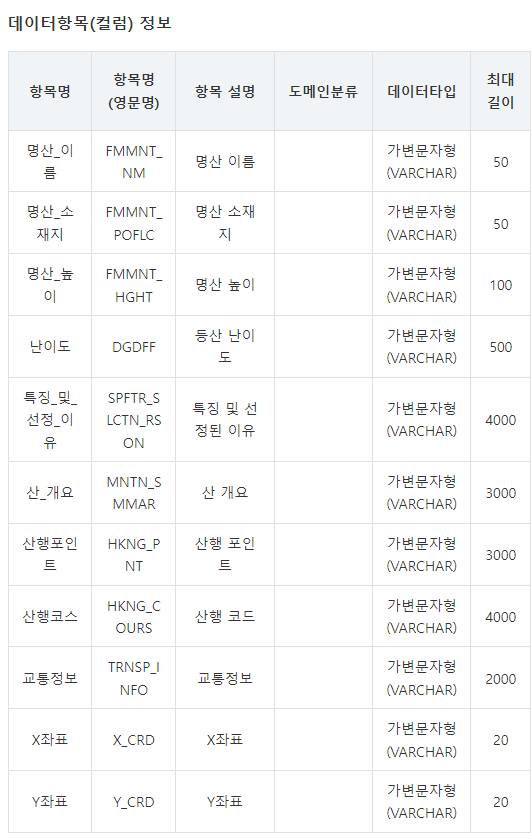

In [2]:
df_main.head(2)

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,산행시간 : 3시간30분~4시간미만산높이 : 1100m ~ 1200m 미만 난이도 : -,"강원도에서 진달래가 가장 많이 피는 산으로 알려져 있고, 참나무 중심의 울창한 산림...",&#91;소양강 비경 담은 신비한 암봉&#93; 가리산은 강원도 홍천군 두촌면과 ...,가리산자연휴양림 통나무 산막을 지나 산길로 들어서면 나무로 만든 안전난간이 설치된 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역...",37.874149,127.960749
1,가리왕산,"강원도 정선군 북평면ㆍ정선읍 회동리, 평창군 진부면",1561.9,산행시간 : -산높이 : 1500m 이상 난이도 : 중급,"가리왕산 8경이 전해질 만큼 경관이 수려하고, 활엽수 극상림이 분포해 있으며, 전국...",&#91;정선아리랑 흐르는 정선의 지붕&#93; 강원도 평창군과 정선군은 이 고장 ...,평창군 대화면 하안미 5리 백일동 버스종점에서 포장도로를 따라 도치동 방향으로 2k...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",장평(장평시외버스터미널 ☎033-332-4209)과 정선(정선터미널 ☎033-563...,37.462881,128.563134


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   명산_이름       100 non-null    object 
 1   명산_소재지      100 non-null    object 
 2   명산_높이       100 non-null    float64
 3   난이도         100 non-null    object 
 4   특징_및_선정_이유  100 non-null    object 
 5   산_개요        100 non-null    object 
 6   산행포인트       100 non-null    object 
 7   산행코스        100 non-null    object 
 8   교통정보        100 non-null    object 
 9   X좌표         100 non-null    float64
 10  Y좌표         100 non-null    float64
dtypes: float64(3), object(8)
memory usage: 8.7+ KB


## 데이터 클렌징 (지도 분석데이터 선정)

### 원본 데이터에 산 높이에 따른 등산난이도(등급) 열 추가

In [4]:
def lv(num):
    if num//500 <= 1:
        return '초급'
    elif num//500 ==2:
        return '중급'
    elif num//500 == 3:
        return '고급'
    elif num//500 <= 4:
        return '초고급'
        

df_main['등급']=df_main['명산_높이'].apply(lv)
df_main.tail(1)

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표,등급
99,희양산,"경상북도 문경시 가은읍, 충청북도 괴산군 연풍면",996.4,산행시간 : -산높이 : 900m ~ 1000m 미만난이도 : -,산 전체가 하나의 바위처럼 보이고 바위 낭떠러지들이 하얗게 드러나 있어 주변의 산에...,&#91;백두대간의 신령스런 암봉&#93; 희양산(999m)은 경북 문경시 가은...,괴산군 연풍면 은티마을을 기점으로 등산로가 발달되어 있다. 은티마을 동쪽으로 난 농...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","기점은 연풍이다. 연풍에서 은티마을행 시내버스는 08:10, 13:10, 18:5...",36.716064,128.0027,초급


In [5]:
df_addr = df_main[['명산_이름','명산_소재지','명산_높이','X좌표','Y좌표','교통정보']]
df_addr.head(2)

,명산_이름,명산_소재지,명산_높이,X좌표,Y좌표,교통정보
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,37.874149,127.960749,"홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역..."
1,가리왕산,"강원도 정선군 북평면ㆍ정선읍 회동리, 평창군 진부면",1561.9,37.462881,128.563134,장평(장평시외버스터미널 ☎033-332-4209)과 정선(정선터미널 ☎033-563...


## 전국 100대 명산 : 맵에 전체 지도데이터 표시

In [10]:
from folium import Marker
m = folium.Map(location=[35.21, 127.77],zoom_start=7,width=750, height=750,)

for name, lat, lng, m_addr, m_info in zip(df_addr['명산_이름'],df_addr['X좌표'],df_addr['Y좌표'],df_addr['명산_소재지'],df_addr['교통정보']):
    Marker(location =[lat,lng],
           zoom_start=10, 
           popup="<div style='min-width:300px; font-size:14px; word-wrap:break-word;'>"
           "<h4><b>"+name+"</b></h4><b>"+m_addr+"</b></div>"+m_info+"</div>",
           tooltip=name,
           icon=folium.Icon(color='green',icon='bookmark')
           ).add_to(m)
m